# LAGOON-MCL jupyter notebook

Welcome to the jupyter notebook.

It allows you to explore the results obtained with LAGOON-MCL in an interactive way.

## Installation and use

1. Setting up the environment with Conda or Mamba

```bash
# CONDA
conda env create -f environment.yaml

# MAMBA
mamba env create -f environment.yaml
```

2. Environment activation

```bash
# CONDA
conda activate jupyter-lagoon-mcl

# MAMBA
mamba activate jupyter-lagoon-mcl
```

3. Open lagoon-mcl.ipynb

```bash
jupyter lab lagoon-mcl.ipynb
```

## Information

This jupyter lab uses r-irkernel.

# Step 1: Data preparation

Before starting the analysis with R, it is necessary to merge the different TSV files containing the homogeneity scores into a single TSV file.

## Descrription

- `input = <path>` --> path to folder containing TSV files with homogeneity scores (example: `results/homogeneity_score/inflation_1.4/tsv_all`).
- `output = <path>` --> path where merged tsv files will be stored.
- `inflation = <float>` --> inflation parameter used to build clusters.
- `type = <str>` --> type of homogeneity score calculation (all or annotated)

## Use

This operation must be performed for each inflation parameter.

In [29]:
input = "/home/jrousseau/Documents/homogeneity_score/inflation_1.4/tsv_all"
output = "/home/jrousseau/Documents/homogeneity_score/data"
inflation = 1.4
type = "all"

In [30]:
system(command = paste("./merge.sh", input, inflation, type, output, sep = " "))

# Step 2: Data analysis

## 2.A. Load packages

In [31]:
library(ggplot2)
library(dplyr)
library(tidyr)

## 2.B. Load dataframe

* `path_dataframe` <- <path> --> path where merged tsv files will be stored.

In [32]:
path_dataframe <- "data/homogeneity_score_I1.4_all.tsv"

dataframe <- read.table(path_dataframe, sep = "\t", header = TRUE)

## 2.C. Columns

This command lets you know the names of all the columns in dataframe. In the rest of this jupyter, you'll be able to easily select the columns you're interested in.

In [33]:
names(dataframe)

[1] "CC"                                                 
 [2] "CC_size"                                            
 [3] "homogeneity_score_label_AntiFam_I1.4_all"           
 [4] "homogeneity_score_label_CDD_I1.4_all"               
 [5] "homogeneity_score_label_Class_I1.4_all"             
 [6] "homogeneity_score_label_Coils_I1.4_all"             
 [7] "homogeneity_score_label_Database_I1.4_all"          
 [8] "homogeneity_score_label_Family_I1.4_all"            
 [9] "homogeneity_score_label_FunFam_I1.4_all"            
[10] "homogeneity_score_label_Gene3D_I1.4_all"            
[11] "homogeneity_score_label_Genus_I1.4_all"             
[12] "homogeneity_score_label_Hamap_I1.4_all"             
[13] "homogeneity_score_label_interpro_accession_I1.4_all"
[14] "homogeneity_score_label_MobiDBLite_I1.4_all"        
[15] "homogeneity_score_label_Order_I1.4_all"             
[16] "homogeneity_score_label_PANTHER_I1.4_all"           
[17] "homogeneity_score_label_Pfam_I1.4_all"              
[18] "homogeneity_score_label_Phobius_I1.4_all"           
[19] "homogeneity_score_label_Phylum_I1.4_all"            
[20] "homogeneity_score_label_PIRSF_I1.4_all"             
[21] "homogeneity_score_label_PRINTS_I1.4_all"            
[22] "homogeneity_score_label_ProSitePatterns_I1.4_all"   
[23] "homogeneity_score_label_ProSiteProfiles_I1.4_all"   
[24] "homogeneity_score_label_SFLD_I1.4_all"              
[25] "homogeneity_score_label_SMART_I1.4_all"             
[26] "homogeneity_score_label_Species_I1.4_all"           
[27] "homogeneity_score_label_SUPERFAMILY_I1.4_all"       
[28] "homogeneity_score_label_TIGRFAM_I1.4_all"           
[29] "homogeneity_score_label_TMHMM_I1.4_all"

# Step 3. Data distribution

## 3.A. Homogeneity score

This section plots the distribution of the homogeneity score as a function of the label. With the `min.float` and `max.float` obtions you can select the minimum and maximum value of the homogeneity score.

- `label = <str>` --> label
- `min.float = <float>` --> min homogeneity score
- `max.float = <float>` --> max homogeneity score
- `title.str = <str>` --> title plot
- `x.str = <str>` --> axis x title
- `y.str = <str>` --> axis y title
- `bins.int = <int>`

In [34]:
label <- "homogeneity_score_label_Pfam_I1.4_all"
min.float <- 0.0
max.float <- 1.0
title.str <- "Distribution homogeneity score"
x.str <- "Homogeneity score"
y.str <- "Count"
bins.int <- 50

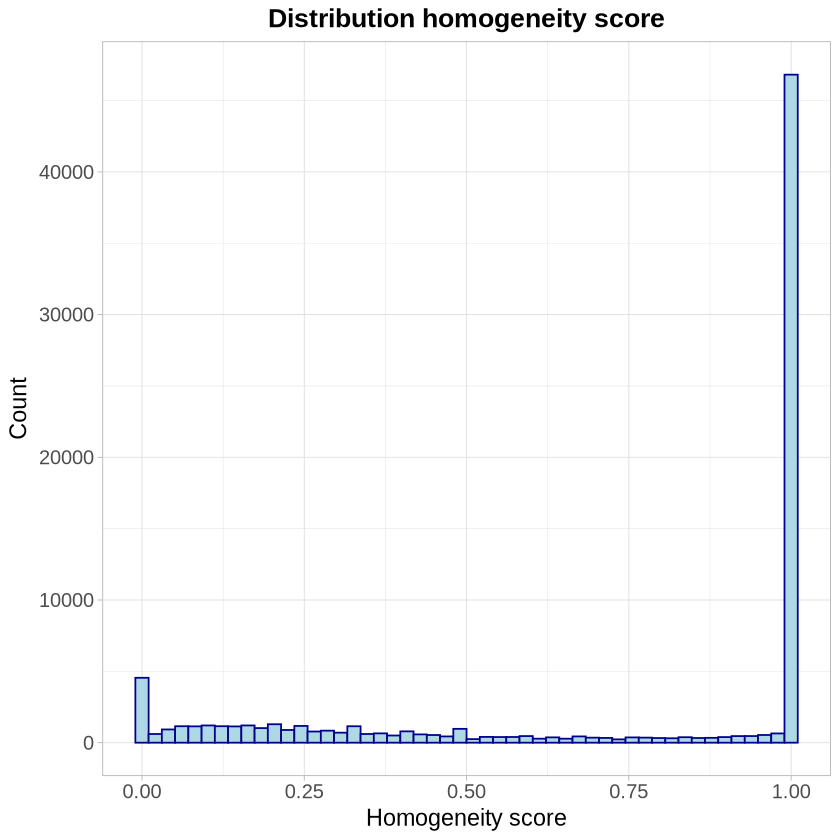

In [35]:
df.select <- dataframe %>% 
  select(c(CC_size, label)) %>% 
  filter(get(label) != "unannotated") %>% 
  filter(as.numeric(get(label)) >= min.float & as.numeric(get(label)) <= max.float)

plot.1 <- df.select %>% 
  ggplot(aes(x = as.numeric(get(label)))) +
  geom_histogram(bins = bins.int, color = 'darkblue', fill = 'lightblue')  +
  theme_light() +
  labs(title = title.str,
       x = x.str,
       y = y.str) +
  theme(plot.title = element_text(size = 16, face = "bold",
                                  hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

plot.1

Save figure in PDF format

In [36]:
file.name <- "distribution_pfam.pdf"

pdf(file = file.name, onefile = TRUE)
  
print(plot.1)

dev.off()

png 
  2

## 3.B. Cluster size

In [39]:
min.float <- 0
max.float <- max(dataframe$CC_size)
title.str <- "Distribution homogeneity score"
x.str <- "Cluster size"
y.str <- "Count"
bins.int <- 50

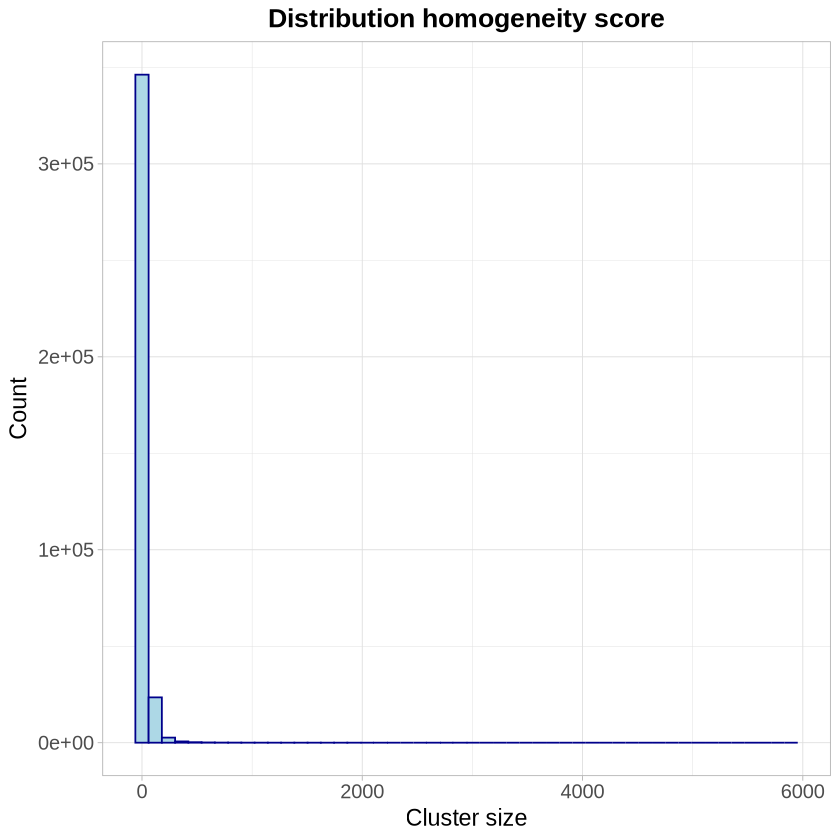

In [40]:
df.select <- dataframe %>% 
  select(CC_size) %>% 
  filter(CC_size >= min.float & CC_size <= max.float)

plot.2 <- df.select %>% 
  ggplot(aes(x = CC_size)) +
  geom_histogram(bins = bins.int, color = 'darkblue', fill = 'lightblue')  +
  theme_light() +
  labs(title = title.str,
       x = x.str,
       y = y.str) +
  theme(plot.title = element_text(size = 16, face = "bold",
                                  hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))
plot.2

Save figure in PDF format

In [41]:
file.name <- "distribution_cluster_size.pdf"

pdf(file = file.name, onefile = TRUE)
  
print(plot.2)

dev.off()

png 
  2

# Step 4. Homogeneity score comparison

- `col.vect <- <vector>`
- `min.float <- <float>`
- `max.float <- <float>`
- `title.str <- <str>`
- `x.str <- <str>`
- `y.str <- <str>`

In [42]:
#col.vect <- names(dataframe)
col.vect <- c("CC", "CC_size",
              "homogeneity_score_label_FunFam_I1.4_all", 
              "homogeneity_score_label_interpro_accession_I1.4_all",
              "homogeneity_score_label_Pfam_I1.4_all", 
              "homogeneity_score_label_Gene3D_I1.4_all")
min.float <- 0.0
max.float <- 1.0
title.str <- "Homogeneity score"
x.str <- "Label"
y.str <- "Homogeneity score"

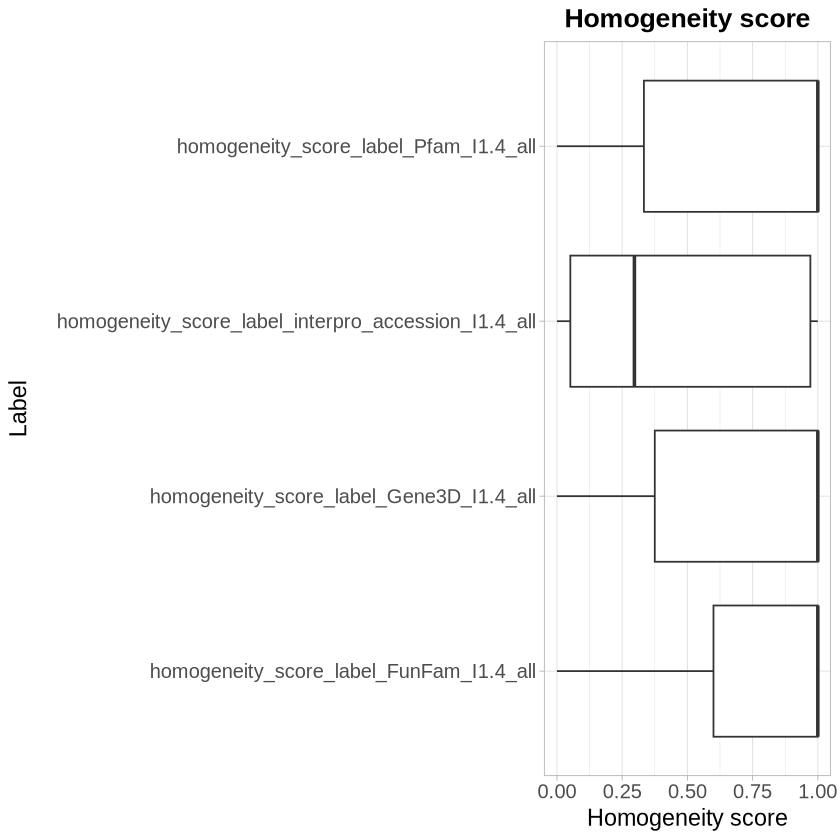

In [43]:
label.vect <- col.vect[-c(1,2)]

df_pivot <- dataframe %>% 
  select(col.vect) %>% 
  mutate_all(as.character) %>% 
  pivot_longer(cols = label.vect,
               names_to = "label",
               values_to = "homogeneity_score") %>% 
  filter(homogeneity_score != "unannotated")

plot.3 <- df_pivot %>% 
  ggplot(aes(x = label, y = as.numeric(homogeneity_score))) +
  geom_boxplot() +
  theme_light() +
  coord_flip() +
  labs(title = title.str,
       x = x.str,
       y = y.str) +
  theme(plot.title = element_text(size = 16, face = "bold",
                                  hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

plot.3

Save figure in PDF format

In [28]:
file.name <- "homogeneity_score_comparison.pdf"

pdf(file = file.name, onefile = TRUE)
  
print(plot.3)

dev.off()

png 
  2

# Step 4. Taxonomy.

Cette étapes peut être utilisé utiliquement si vous avez au moins un label qui correspond à la taxonomie.